# About

**This Lab Enhancement : PCA is prepared by** 

- Group Member 1 - Nur Damia Binti Rohisyam (Student ID - 1211304435)

- Group Member 2 - Faqihah Binti Zakir (Student ID - 1211303109)

- Group Member 3 - Muhammad Zafri Bin Marwan (Student ID - 1201101871)

**Objective:**

The objective of this lab is to deepen understanding and practical implementation of Principal Component Analysis (PCA)

**Dataset Description:**

Link - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
The dataset has 569 instances and 30 features from images of breast cell samples. These features describe cell nuclei to help classify breast masses as benign or malignantm

# Data and Library Insertion

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Data Preprocessing

In [7]:
# check dimensionality
print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1] ) 

Number of rows: 569
Number of features/columns: 33


In [8]:
#missing value
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Drop the specified columns
df = df.drop(columns=['id', 'Unnamed: 32'])

In [10]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [11]:
#duplicated values
print("Total duplicated rows: ", sum(df.duplicated()))

# drop duplicated value
df = df.drop_duplicates()
print("Total duplicated rows After Removing Duplicated Rows: ", sum(df.duplicated()))

Total duplicated rows:  0
Total duplicated rows After Removing Duplicated Rows:  0


In [12]:
#Encode to make all values in numerical form
df['diagnosis'] = df ['diagnosis'].map({'M':1,'B':0})
#Diagnosis (M = malignant, B = benign)

In [13]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [14]:
# Classify features
numeric_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
    'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
target = 'diagnosis'

# Display the categorized columns
print("Numeric Features:")
print(df[numeric_features].head())
print("\nTarget:")
print(df[target].head())

Numeric Features:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_wor

In [15]:
df.shape

(569, 31)

In [16]:
# Check unique values for target variable
values = df[target].unique().tolist()
print(f"{target} unique values: {values}")

# Check unique values for numeric features
for i in numeric_features:
    values = df[i].unique().tolist()
    print(f"{i} unique values: {values}")

diagnosis unique values: [1, 0]
radius_mean unique values: [17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18.25, 13.71, 13.0, 12.46, 16.02, 15.78, 19.17, 15.85, 13.73, 14.54, 14.68, 16.13, 19.81, 13.54, 13.08, 9.504, 15.34, 21.16, 16.65, 17.14, 14.58, 18.61, 15.3, 17.57, 18.63, 11.84, 17.02, 19.27, 16.74, 14.25, 13.03, 14.99, 13.48, 13.44, 10.95, 19.07, 13.28, 13.17, 18.65, 8.196, 12.05, 13.49, 11.76, 13.64, 11.94, 18.22, 15.1, 11.52, 19.21, 14.71, 13.05, 8.618, 10.17, 8.598, 9.173, 12.68, 14.78, 9.465, 11.31, 9.029, 12.78, 18.94, 8.888, 17.2, 13.8, 12.31, 16.07, 13.53, 18.05, 20.18, 12.86, 11.45, 13.34, 25.22, 19.1, 12.0, 18.46, 14.48, 19.02, 12.36, 14.64, 14.62, 15.37, 13.27, 13.45, 15.06, 20.26, 12.18, 9.787, 11.6, 14.42, 13.61, 6.981, 9.876, 10.49, 13.11, 11.64, 22.27, 11.34, 9.777, 12.63, 14.26, 10.51, 8.726, 11.93, 8.95, 14.87, 17.95, 11.41, 18.66, 24.25, 14.5, 13.37, 13.85, 19.0, 19.79, 12.19, 15.46, 16.16, 15.71, 18.45, 12.77, 11.71, 11.43, 14.95, 11.28, 9.738, 16.11, 12.9, 10.75, 

In [17]:
print(f'Data types:\n{df.dtypes}')

Data types:
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave 

In [18]:
# Summary statistics
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

# Exploratory Data Analysis

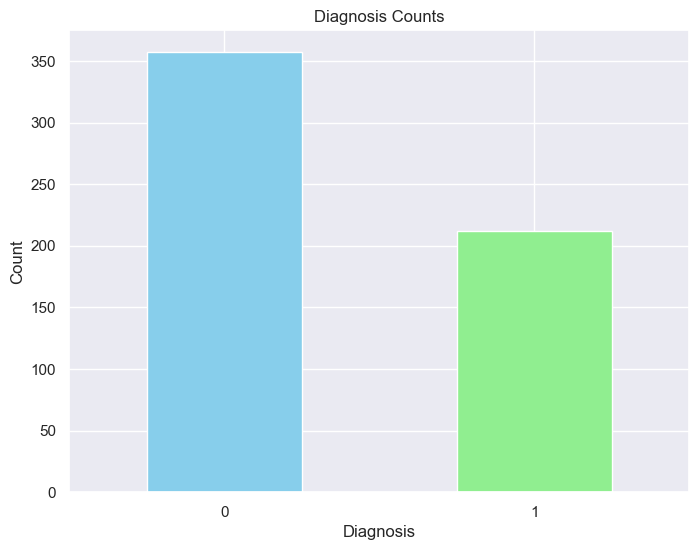

In [20]:
import matplotlib.pyplot as plt

# Create a bar chart for the 'diagnosis' column
diagnosis_counts = df['diagnosis'].value_counts()
#Diagnosis (M (1) = malignant, B (0) = benign)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

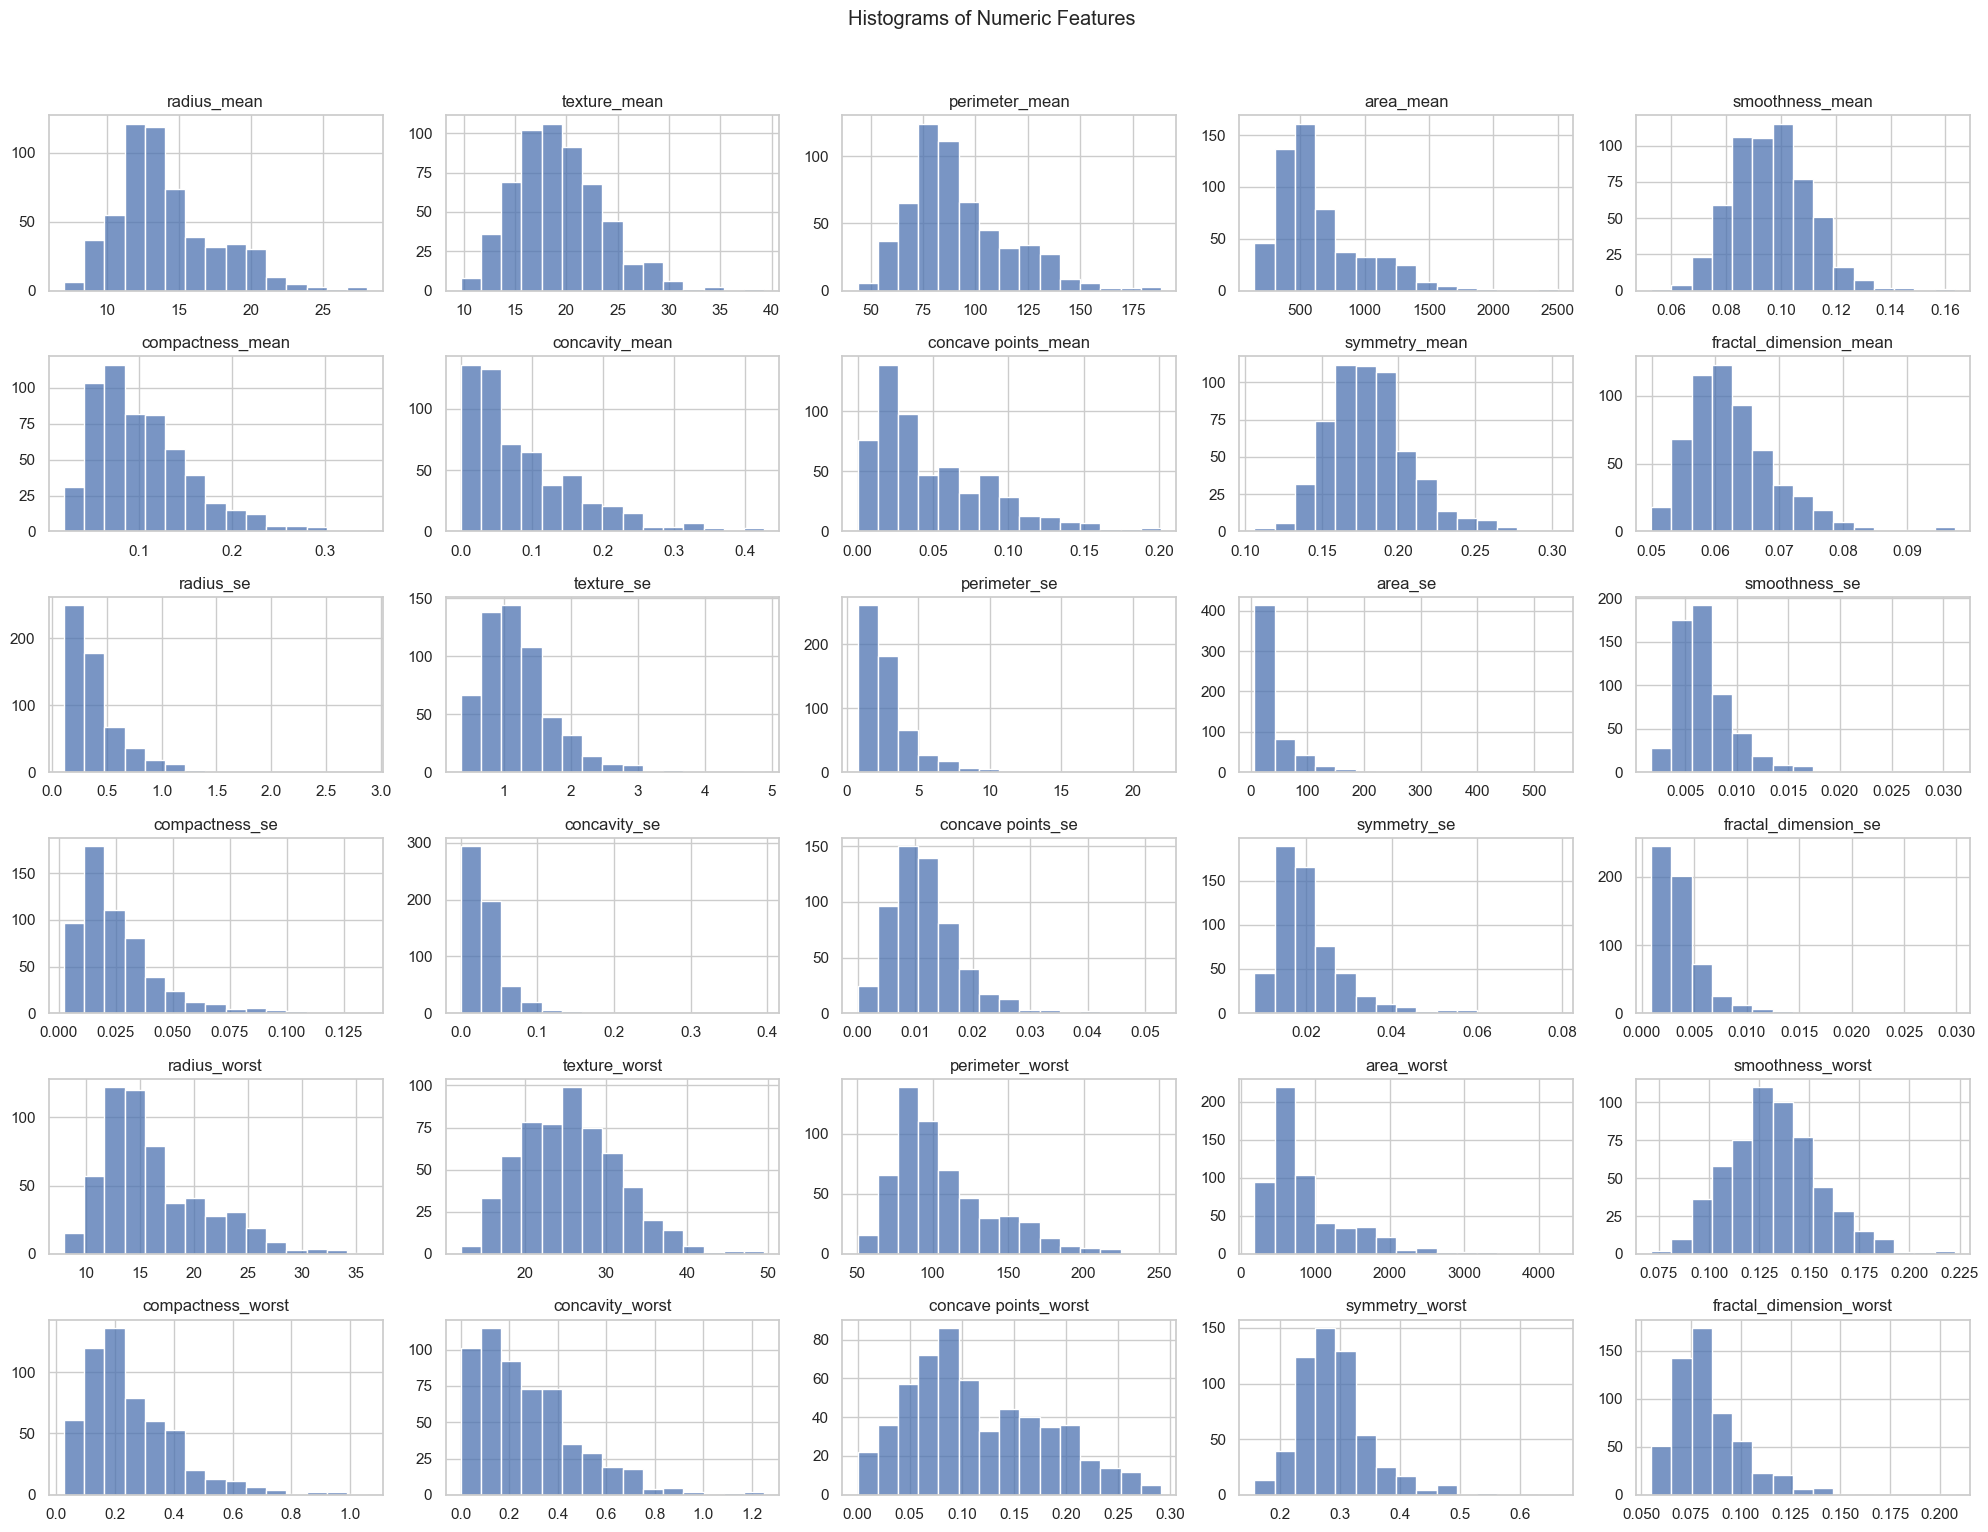

In [21]:
sns.set(style="whitegrid")

# Determine the number of rows and columns for the subplots
num_features = len(numeric_features)
num_rows = (num_features + 4) // 5  # This ensures we have enough rows

# Create histograms for each numeric feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(num_rows, 5, i + 1)
    sns.histplot(df[feature], bins=15, kde=False)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

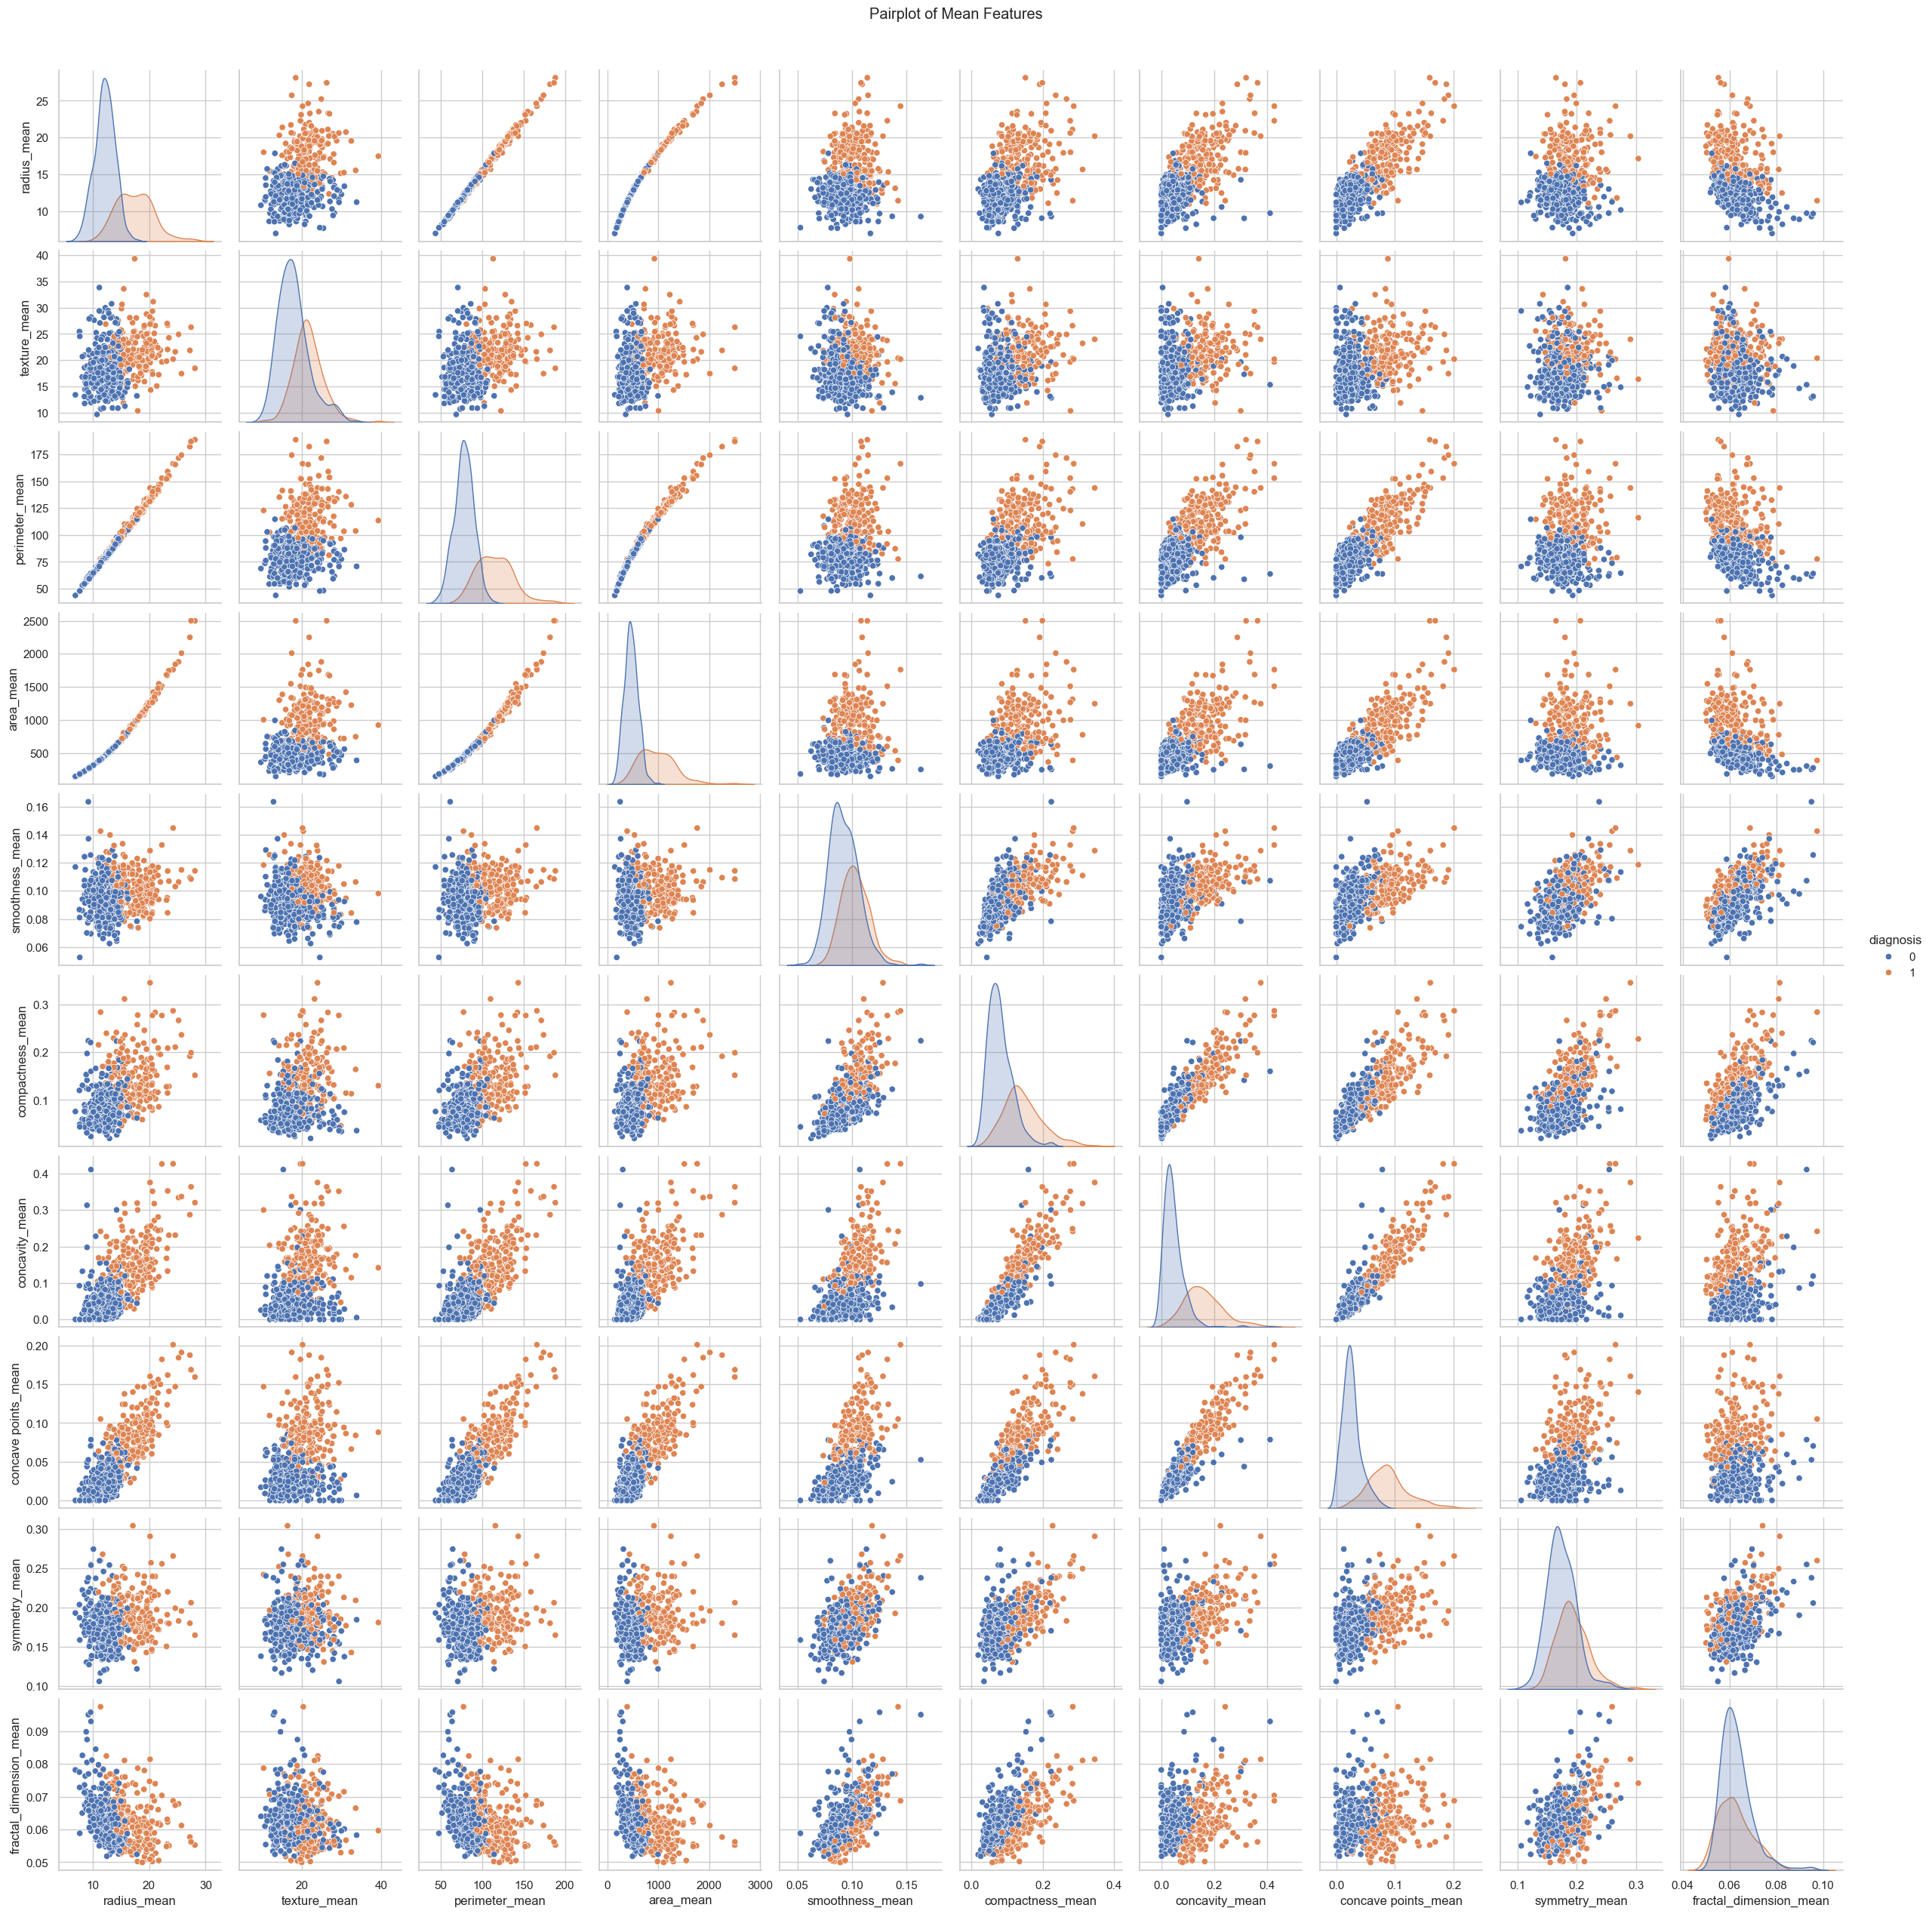

In [22]:
mean_features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                 'symmetry_mean', 'fractal_dimension_mean']

# Create pairplot
sns.pairplot(df[mean_features], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Mean Features', y=1.02)
plt.show()

In [23]:
df_cleaned = df.copy()

At this point, data has been cleaned and explored

New Variable that holds the cleaned data is now named "df_cleaned"

# Feature Engineering

Now, perform Feature Engineering which include:

1. Data Splitting: training set and testing set 
2. Data Normalization (involve numerical variable)
3. balance / imbalance: use smote to balance (balance the target variable only)
4. PCA
5. impute: to handle null values (not required in this project because we dont have any null values)
6. timestamp: to handle time value (not required in this project because we dont have any time values)

In [27]:
df_cleaned.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### Correlation Matrix

Correlation Matrix helps to identify features that are strongly related to the target variable and to detect features that are highly related to each other (multicollinearity).

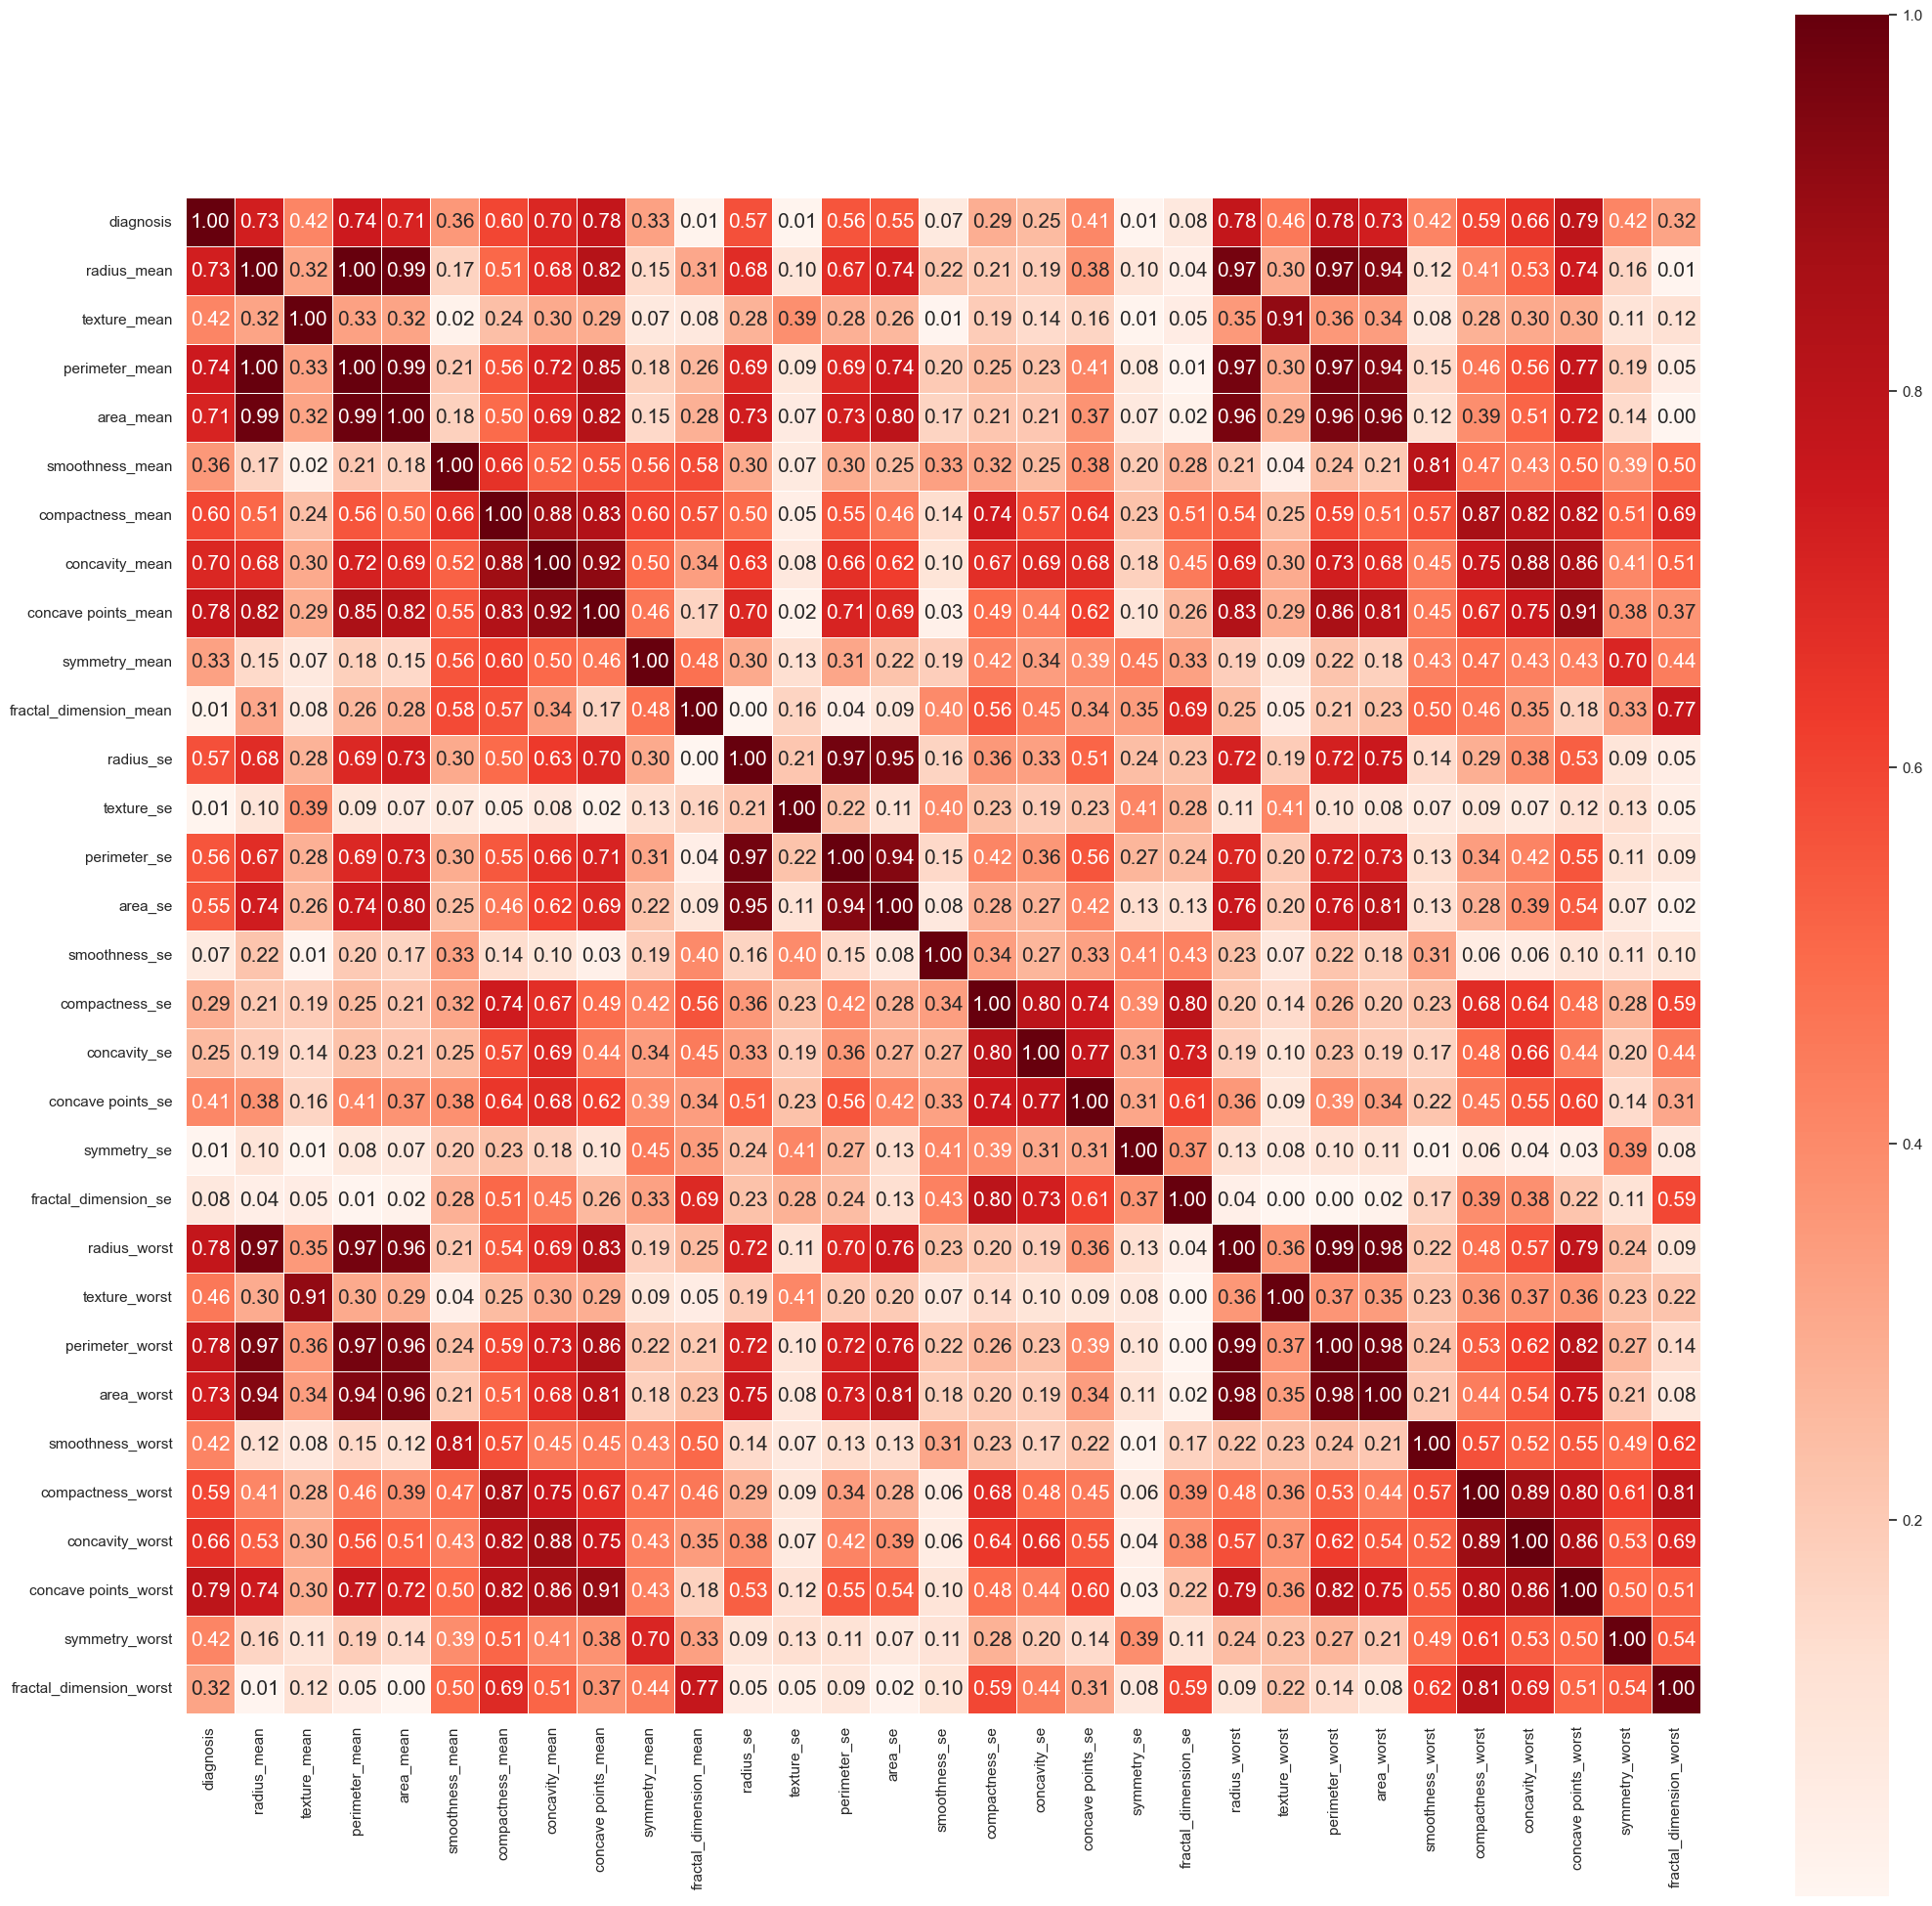

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_cleaned.corr().abs()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='Reds', linewidths=.5)
plt.show()

Instead of removing the variables, we reduce the dimensions of the dataset with the help of PCA.

In [32]:
features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
    'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
target = 'diagnosis'

# Principal Component Analysis

Apply PCA on Training Set: 

Here we perform PCA on the training set only. This is important because we want to fit PCA only on the training data to avoid data leakage from the test set.

Steps for dimensionality reduction using Principal Component Analysis(PCA)

1. Standardize the data

2. Compute the covariance matrix

3. Calculate the eigenvectors and eigenvalues

4. Sort eigenvalues in descending order and compute the Principal Components

5. Reduce the dimensions of the data set

### Step 1 - Standardize The Data

PCA is sensitive to the scale of features, so it's essential to standardize the data before applying PCA.

In [38]:
# Split data into features and target
X = df_cleaned.drop(columns=['diagnosis'])  # Drop the target column
y = df_cleaned['diagnosis']  # Target column

In [39]:
# Calculate mean and standard deviation
xbar = X.mean(axis=0)
sigma = X.std(axis=0, ddof=1)  # ddof=1 divides by N-1 for std

In [40]:
# Standardize the data
Z = (X - xbar) / sigma

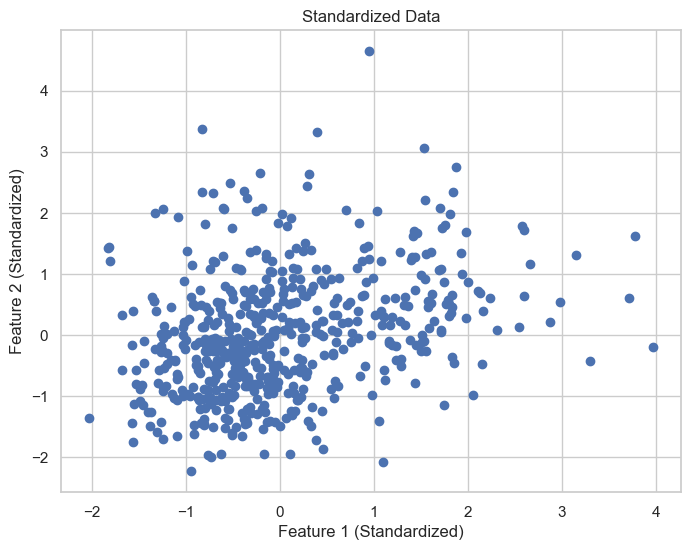

In [41]:
# Visualize the standardized data
plt.figure(figsize=(8, 6))
plt.scatter(Z.iloc[:, 0], Z.iloc[:, 1])
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Standardized Data')
plt.grid(True)
plt.show()

In [42]:
# Print mean and standard deviation of standardized data
print("Mean of standardized data:")
print(Z.mean(axis=0).round(2))
print("\nStandard deviation of standardized data:")
Z.std(axis=0,ddof=1)

Mean of standardized data:
radius_mean               -0.0
texture_mean               0.0
perimeter_mean            -0.0
area_mean                 -0.0
smoothness_mean           -0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean       -0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                -0.0
perimeter_se              -0.0
area_se                   -0.0
smoothness_se             -0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se      -0.0
radius_worst              -0.0
texture_worst              0.0
perimeter_worst           -0.0
area_worst                 0.0
smoothness_worst          -0.0
compactness_worst         -0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst   -0.0
dtype: float64

Standard deviation of stand

radius_mean                1.0
texture_mean               1.0
perimeter_mean             1.0
area_mean                  1.0
smoothness_mean            1.0
compactness_mean           1.0
concavity_mean             1.0
concave points_mean        1.0
symmetry_mean              1.0
fractal_dimension_mean     1.0
radius_se                  1.0
texture_se                 1.0
perimeter_se               1.0
area_se                    1.0
smoothness_se              1.0
compactness_se             1.0
concavity_se               1.0
concave points_se          1.0
symmetry_se                1.0
fractal_dimension_se       1.0
radius_worst               1.0
texture_worst              1.0
perimeter_worst            1.0
area_worst                 1.0
smoothness_worst           1.0
compactness_worst          1.0
concavity_worst            1.0
concave points_worst       1.0
symmetry_worst             1.0
fractal_dimension_worst    1.0
dtype: float64

### Step 2 - Compute the covariance matrix

PCA uses the covariance matrix to understand how variables are related to each other.

In [45]:
# Compute the covariance matrix
cov_matrix = np.cov(Z, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.00000000e+00  3.23781891e-01  9.97855281e-01  9.87357170e-01
   1.70581187e-01  5.06123578e-01  6.76763550e-01  8.22528522e-01
   1.47741242e-01 -3.11630826e-01  6.79090388e-01 -9.73174431e-02
   6.74171616e-01  7.35863663e-01 -2.22600125e-01  2.05999980e-01
   1.94203623e-01  3.76168956e-01 -1.04320881e-01 -4.26412691e-02
   9.69538973e-01  2.97007644e-01  9.65136514e-01  9.41082460e-01
   1.19616140e-01  4.13462823e-01  5.26911462e-01  7.44214198e-01
   1.63953335e-01  7.06588569e-03]
 [ 3.23781891e-01  1.00000000e+00  3.29533059e-01  3.21085696e-01
  -2.33885160e-02  2.36702222e-01  3.02417828e-01  2.93464051e-01
   7.14009805e-02 -7.64371834e-02  2.75868676e-01  3.86357623e-01
   2.81673115e-01  2.59844987e-01  6.61377735e-03  1.91974611e-01
   1.43293077e-01  1.63851025e-01  9.12716776e-03  5.44575196e-02
   3.52572947e-01  9.12044589e-01  3.58039575e-01  3.43545947e-01
   7.75033588e-02  2.77829592e-01  3.01025224e-01  2.95315843e-01
   1.05007910e-01  1.

### Step 3 - Calculate the eigenvectors and eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that PCA relies upon.

In [48]:
# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]

Eigenvectors:
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-0

### Step 4 - Sort eigenvalues in descending order and compute the Principal Components

PCA will reduce dimensionality based on the eigenvalues, so it's crucial to sort them.

In [51]:
# Sort eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Print eigenvalues in descending order
print("Print Eigenvalues in Descending Order:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue:.4f}")

Print Eigenvalues in Descending Order:
Eigenvalue 1: 13.2816
Eigenvalue 2: 5.6914
Eigenvalue 3: 2.8179
Eigenvalue 4: 1.9806
Eigenvalue 5: 1.6487
Eigenvalue 6: 1.2074
Eigenvalue 7: 0.6752
Eigenvalue 8: 0.4766
Eigenvalue 9: 0.4169
Eigenvalue 10: 0.3507
Eigenvalue 11: 0.2939
Eigenvalue 12: 0.2612
Eigenvalue 13: 0.2414
Eigenvalue 14: 0.1570
Eigenvalue 15: 0.0941
Eigenvalue 16: 0.0799
Eigenvalue 17: 0.0594
Eigenvalue 18: 0.0526
Eigenvalue 19: 0.0495
Eigenvalue 20: 0.0312
Eigenvalue 21: 0.0300
Eigenvalue 22: 0.0274
Eigenvalue 23: 0.0243
Eigenvalue 24: 0.0181
Eigenvalue 25: 0.0155
Eigenvalue 26: 0.0082
Eigenvalue 27: 0.0069
Eigenvalue 28: 0.0016
Eigenvalue 29: 0.0007
Eigenvalue 30: 0.0001


### Step 5 - Reduce the dimensions of the data set

To begin, the graph below will visualize the explained variance by principal components, which helps us decide the number of components (n_components) to use for reducing the dimensionality of our data with PCA. 

Also, The plot below is where we use a form of the elbow method to determine the number of principal components (n_components) for dimensionality reduction using PCA.

#### Identify Number of Components to Choose

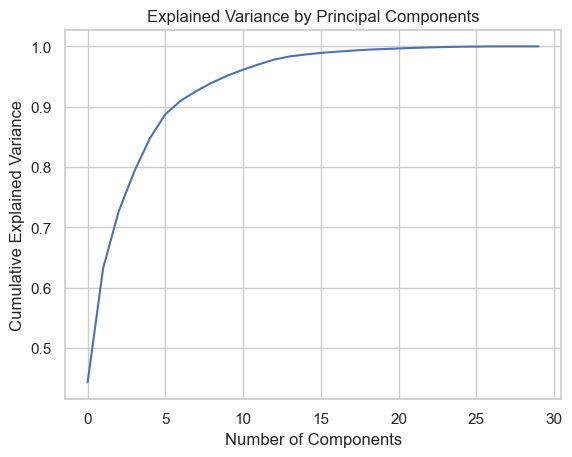

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Compute PCA
pca = PCA().fit(Z)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

Based on the plot, determine the number of principal components (n_components) . This decision can be guided by the point where the explained variance curve starts to flatten out (elbow point). Use the selected number of components to transform original data (Z) into the reduced-dimensional space.

#### Approach 1: Compute Principal Component Using Eigenvectors from previous PCA Analysis

In [59]:
n_components = 5  # so this is selected number of components to transform original data (Z) into the reduced-dimensional space.

In [60]:
# Compute principal components
principal_components = Z.dot(eigenvectors[:, :n_components])

# Transform the data using the selected eigenvector subset
transformed = Z.dot(eigenvectors[:, :n_components])

# Print the shape of transformed data
print("Shape of transformed data:", transformed.shape)

# Print the first few rows of transformed data
print("Transformed data:")
print(transformed)

Shape of transformed data: (569, 5)
Transformed data:
             0          1         2         3         4
0     9.184755   1.946870 -1.122179  3.630536  1.194059
1     2.385703  -3.764859 -0.528827  1.117281 -0.621228
2     5.728855  -1.074229 -0.551263  0.911281  0.176930
3     7.116691  10.266556 -3.229948  0.152413  2.958275
4     3.931842  -1.946359  1.388545  2.938054 -0.546267
..         ...        ...       ...       ...       ...
564   6.433655  -3.573673  2.457324  1.176279  0.074759
565   3.790048  -3.580897  2.086640 -2.503825  0.510274
566   1.255075  -1.900624  0.562236 -2.087390 -1.808400
567  10.365673   1.670540 -1.875379 -2.353960  0.033712
568  -5.470430  -0.670047  1.489133 -2.297136  0.184541

[569 rows x 5 columns]


This means now we have a dataset with 455 rows and 5 columns after applying PCA.

Principal components (PCs) in PCA are new variables that summarize the original data. The first principal component, PC0, is the most important. Each number in its column tells you how well a sample fits this pattern. PC1 is the next most important, with its own column in the transformed data. It shows how well each sample fits its pattern. PC2, PC3, and PC4 are also important, each in its own column. They show how well each sample fits their patterns. PC2 is the third most important, PC3 the fourth, and PC4 the fifth.

#### Approach 2: Compute Principal Component Using sklearn's PCA

In [64]:
# Compute PCA with the selected number of components using sklearn's PCA
pca = PCA(n_components=n_components).fit(Z)

# Transform the data to the reduced-dimensional space
Z_pca = pca.transform(Z)

# Print shapes
print("Shape of Original Data (Z):", Z.shape)
print("Shape of Transformed Data (Z_pca):", Z_pca.shape)

# Print both
print("Original Data (Z):")
print(Z)

print("\nTransformed Data (Z_pca):")
print(Z_pca)

Shape of Original Data (Z): (569, 30)
Shape of Transformed Data (Z_pca): (569, 5)
Original Data (Z):
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.8

# Conclusion


PCA simplified our dataset by reducing its dimensionality while preserving essential information. It showed us which features hold the most variance, making the data easier to interpret and analyze. By condensing the data, PCA made our subsequent analyses more efficient. It revealed relationships and patterns that were hard to see in the original dataset, making it a valuable tool for data exploration and understanding.

# Application: PCA in Logistic Regression Model

Principal Component Analysis (PCA) is often used in machine learning to reduce the dimensionality of data while retaining most of the variance. This can help improve the performance of machine learning models, including logistic regression, by removing multicollinearity and reducing overfitting.

In [69]:
# Combine PCA-transformed features with the target variable
df_pca = pd.DataFrame(Z_pca)
df_pca['diagnosis'] = y.values

To check Logistic Regression accuracy before and after PCA

In [80]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg_before_pca = LogisticRegression()

# Train the model
log_reg_before_pca.fit(X_train, y_train)

# Make predictions on test set
y_pred_before_pca = log_reg_before_pca.predict(X_test)

# Calculate accuracy
accuracy_before_pca = accuracy_score(y_test, y_pred_before_pca)
print(f'Accuracy before PCA: {accuracy_before_pca:.2f}')

Accuracy before PCA: 0.97


In [82]:
# Combine PCA-transformed features with target variable 'diagnosis'
df_pca = pd.DataFrame(Z_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
df_pca['diagnosis'] = y.values

# Separate PCA-transformed features and target variable
X_pca = df_pca.drop(columns=['diagnosis'])
y_pca = df_pca['diagnosis']

# Split into train and test sets for PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Initialize Logistic Regression model for PCA-transformed data
log_reg_after_pca = LogisticRegression()

# Train the model on PCA-transformed data
log_reg_after_pca.fit(X_train_pca, y_train_pca)

# Make predictions on test set for PCA-transformed data
y_pred_after_pca = log_reg_after_pca.predict(X_test_pca)

# Calculate accuracy for PCA-transformed data
accuracy_after_pca = accuracy_score(y_test_pca, y_pred_after_pca)
print(f'Accuracy after PCA: {accuracy_after_pca:.2f}')

Accuracy after PCA: 0.98


# Accuracy Comparison of Logistic Regression before and after PCA

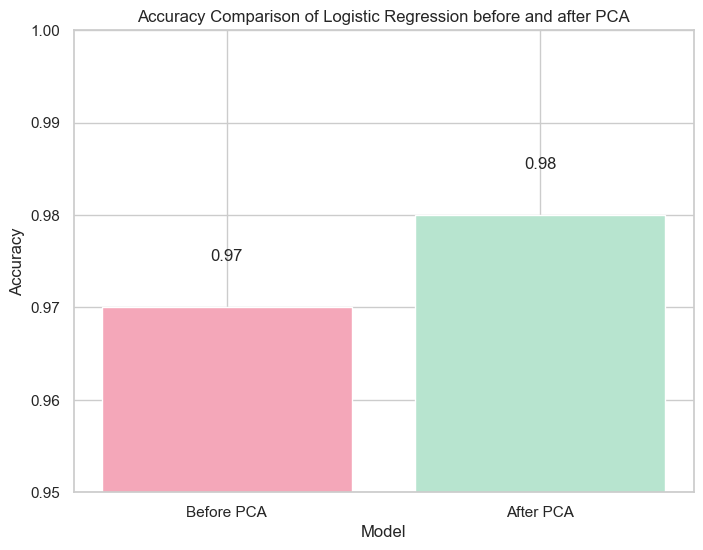

In [85]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [0.97, 0.98]
models = ['Before PCA', 'After PCA']
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#f4a7b9', '#b7e4cf'])  # Soft pink and soft green colors
plt.title('Accuracy Comparison of Logistic Regression before and after PCA')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Adding the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.2f}', ha='center')

# Showing the plot
plt.ylim(0.95, 1.0)  # Set y-axis limits for better visualization
plt.show()


# Conclusion

From the results we've seen, using Principal Component Analysis (PCA) made the Logistic Regression model slightly better at predicting the 'diagnosis' compared to before using PCA. Before PCA, the model was right about 97% of the time, which is pretty good. But after using PCA with 5 components, the accuracy went up a bit to 98%. This means PCA helped by making the data simpler while still keeping the important parts that help the model make accurate predictions. So, PCA not only made the calculations faster but also made the model better at understanding the data and predicting the 'diagnosis' correctly more often.